In [45]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import folium
from folium import plugins
import seaborn as sns
from datetime import timedelta
from datetime import date
import datetime as dt

In [30]:
df = pd.read_csv('Resources/crime.csv', delimiter=',')
df.dataframeName = 'crime.csv.zip'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 487909 rows and 19 columns.


In [55]:
df.head(10)

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,1/4/2022 12:00:00 PM,1/4/2022 8:36:00 PM,128 S CANOSA CT ...,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 06:45:00,NaN,1/3/2022 11:01:00 AM,650 15TH ST ...,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 01:00:00,NaN,1/3/2022 6:11:00 AM,919 E COLFAX AVE ...,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,NaN,1/3/2022 9:12:00 PM,2345 W ALAMEDA AVE ...,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 17:06:00,NaN,1/3/2022 8:31:00 PM,7800 E SMITH RD ...,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0
5,20223903,20223903299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 16:40:00,NaN,1/3/2022 7:07:00 PM,857 E COLFAX AVE ...,3147195.0,1695029.0,-104.976582,39.740495,6.0,621.0,north-capitol-hill,1,0
6,20223899,20223899299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 16:19:00,NaN,1/3/2022 4:21:00 PM,1501 S COLORADO BLVD ...,3157325.0,1676368.0,-104.940969,39.689101,3.0,312.0,cory-merrill,1,0
7,20223888,20223888299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 16:15:00,NaN,1/3/2022 11:05:00 PM,1133 N LINCOLN ST ...,3144418.0,1692850.0,-104.986500,39.734556,6.0,623.0,capitol-hill,1,0
8,20228085,20228085299900,2999,0,criminal-mischief-other,public-disorder,2022-01-05 19:00:00,1/6/2022 7:00:00 AM,1/6/2022 9:03:00 AM,2500 E CHERRY CREEK S DR ...,3152806.0,1685804.0,-104.956826,39.715080,3.0,311.0,belcaro,1,0
9,20224563,20224563299900,2999,0,criminal-mischief-other,public-disorder,2022-01-04 04:30:00,1/4/2022 4:40:00 AM,1/4/2022 5:09:00 AM,620 N SANTA FE DR ...,3141081.0,1689737.0,-104.998426,39.726062,1.0,123.0,lincoln-park,1,0


In [50]:
df['FIRST_OCCURRENCE_DATE'] = df['FIRST_OCCURRENCE_DATE'].astype('datetime64[ns]')

In [51]:
print (df.FIRST_OCCURRENCE_DATE.min())

2017-01-02 00:00:00


In [52]:
print (df.FIRST_OCCURRENCE_DATE.max())

2022-05-02 21:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487909 entries, 0 to 487908
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             487909 non-null  int64  
 1   offense_id              487909 non-null  int64  
 2   OFFENSE_CODE            487909 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  487909 non-null  int64  
 4   OFFENSE_TYPE_ID         487909 non-null  object 
 5   OFFENSE_CATEGORY_ID     487909 non-null  object 
 6   FIRST_OCCURRENCE_DATE   487909 non-null  object 
 7   LAST_OCCURRENCE_DATE    183449 non-null  object 
 8   REPORTED_DATE           487909 non-null  object 
 9   INCIDENT_ADDRESS        448952 non-null  object 
 10  GEO_X                   483720 non-null  float64
 11  GEO_Y                   483720 non-null  float64
 12  GEO_LON                 483719 non-null  float64
 13  GEO_LAT                 483719 non-null  float64
 14  DISTRICT_ID         

In [5]:
temp=display(df.groupby([df.OFFENSE_CODE,df.OFFENSE_CODE_EXTENSION,df.OFFENSE_TYPE_ID]).size())
pd.set_option('display.max_rows',500)
print(temp)

OFFENSE_CODE  OFFENSE_CODE_EXTENSION  OFFENSE_TYPE_ID              
902           0                       homicide-family                    33
907           0                       homicide-police-by-gun              4
910           0                       homicide-negligent                  1
912           0                       homicide-other                    335
1006          0                       kidnap-adult-victim               212
                                                                       ... 
7199          1                       property-crimes-other             182
7399          0                       public-order-crimes-other          15
              1                       fireworks-possession              158
              2                       public-order-crimes-other        4552
              3                       accessory-conspiracy-to-crime     100
Length: 199, dtype: int64

None


In [6]:
temp=display(df.groupby([df.OFFENSE_CATEGORY_ID]).size())
pd.set_option('display.max_rows',50)
print(temp)

OFFENSE_CATEGORY_ID
aggravated-assault               14220
all-other-crimes                 76381
arson                              753
auto-theft                       42654
burglary                         25081
drug-alcohol                     23213
larceny                          51309
murder                             399
other-crimes-against-persons     22711
public-disorder                  51973
robbery                           6511
sexual-assault                    4189
theft-from-motor-vehicle         52414
traffic-accident                109662
white-collar-crime                6439
dtype: int64

None


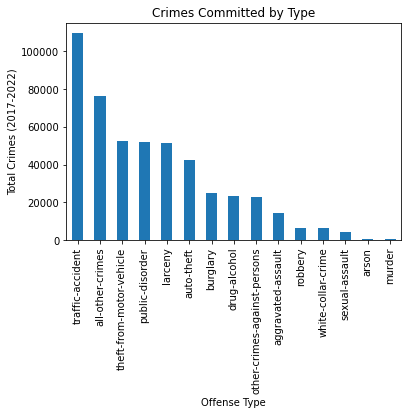

In [53]:
df['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')
plt.title('Crimes Committed by Type')
plt.xlabel('Offense Type')
plt.ylabel('Total Crimes (2017-2022)')
plt.show()

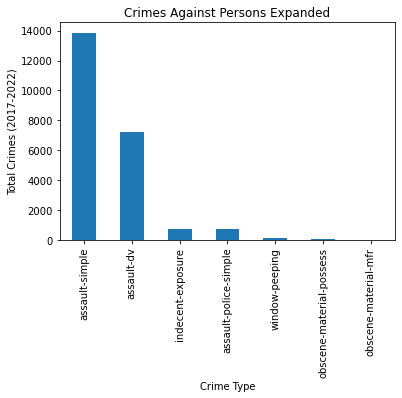

In [54]:
denver_misc_crimes=df[df['OFFENSE_CATEGORY_ID']=='other-crimes-against-persons'].OFFENSE_TYPE_ID.value_counts().plot(kind='bar')
plt.title('Crimes Against Persons Expanded')
plt.xlabel('Crime Type')
plt.ylabel('Total Crimes (2017-2022)')
plt.show()

In [32]:
# This function lets you create your own heatmaps using the provided latitude and longitude coordinates
# the function parameters filter denver_crime by its columns. pass in a tuple of (column_name,column_value) and it 
# will create a heatmap with the entries that satisfy the condition. You can have as many filters as you'd like
def heatmap_creator(*args):
    #filter out all entries with no Lat/Lon data
    check_for_coordinates=df['GEO_LAT'].isna()|df['GEO_LON'].isna()
    temp=df[~check_for_coordinates]
    #filter based on the provided parameters
    for item in args:
        a,b=item
        temp=temp[temp[a]==b]
        print(str(a)+': '+str(b))
    #Generate heatmap
    hm_prep=temp[['GEO_LAT','GEO_LON']].to_numpy()
    m = folium.Map(location=[39.73,-104.90], tiles='Stamen Toner',zoom_start=11, control_scale=True)
    m.add_children(plugins.HeatMap(hm_prep,radius=15))
    return display(m)

In [33]:
heatmap_creator(('OFFENSE_CATEGORY_ID','murder'))

OFFENSE_CATEGORY_ID: murder


/var/folders/83/7hkzdr6n7q97vr3n1kd8p5qm0000gn/T/ipykernel_4537/634659066.py:16: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  m.add_children(plugins.HeatMap(hm_prep,radius=15))


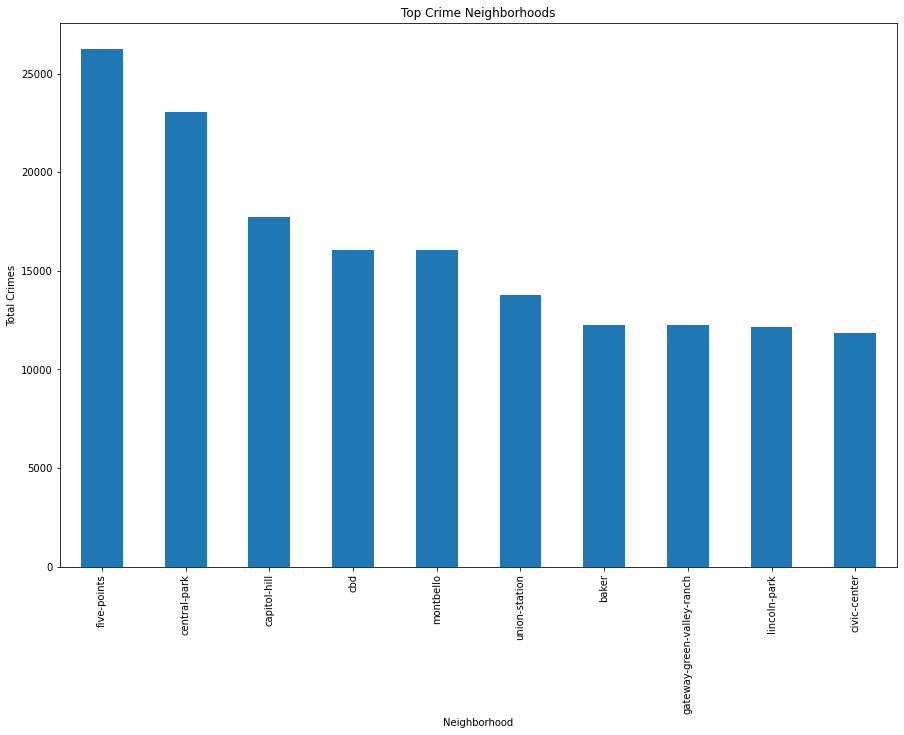

In [11]:
df['NEIGHBORHOOD_ID'].value_counts()[:10].plot(kind='bar',figsize=(15,10))
plt.title('Top Crime Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Total Crimes')
plt.show()

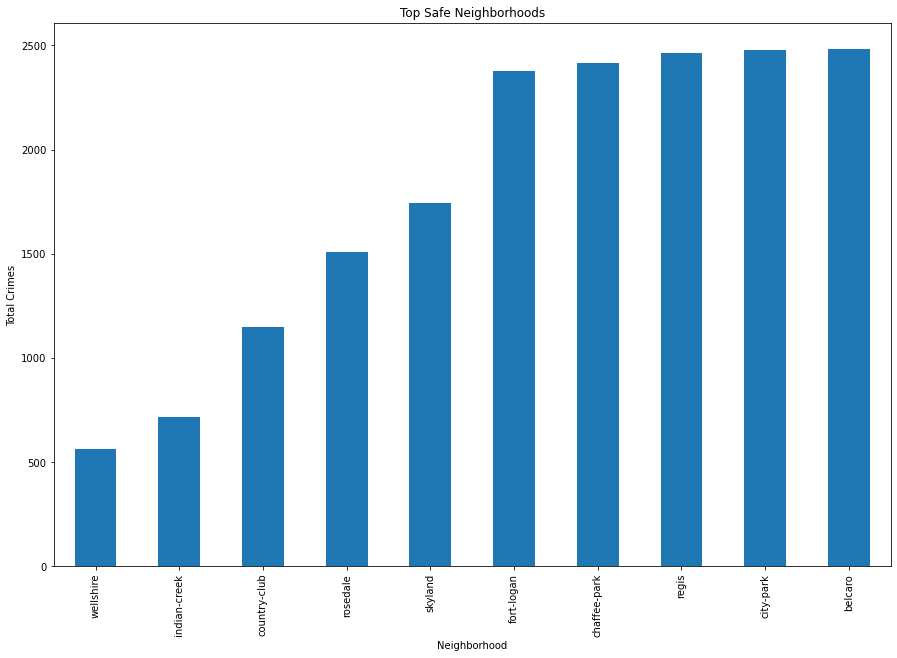

In [12]:
df['NEIGHBORHOOD_ID'].value_counts(ascending=True)[:10].plot(kind='bar',figsize=(15,10))
plt.title('Top Safe Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Total Crimes')
plt.show()

In [13]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [14]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [15]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

/var/folders/83/7hkzdr6n7q97vr3n1kd8p5qm0000gn/T/ipykernel_4537/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


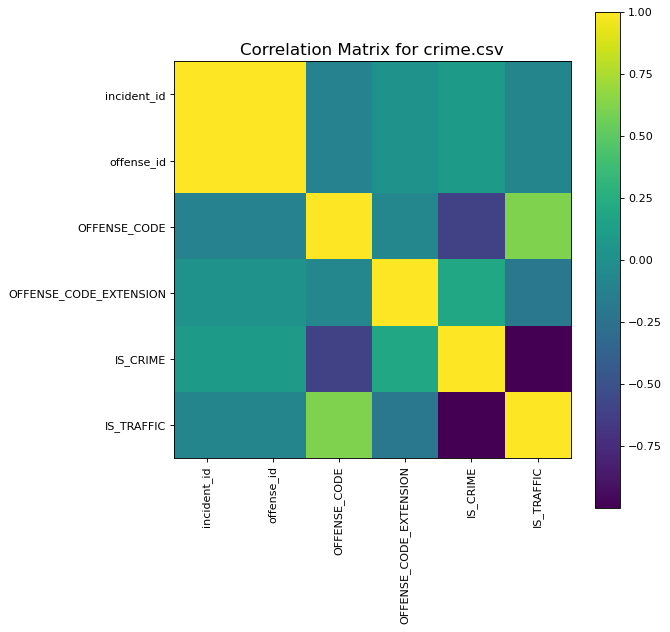

In [16]:
plotCorrelationMatrix(df, 8)

/var/folders/83/7hkzdr6n7q97vr3n1kd8p5qm0000gn/T/ipykernel_4537/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
/var/folders/83/7hkzdr6n7q97vr3n1kd8p5qm0000gn/T/ipykernel_4537/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


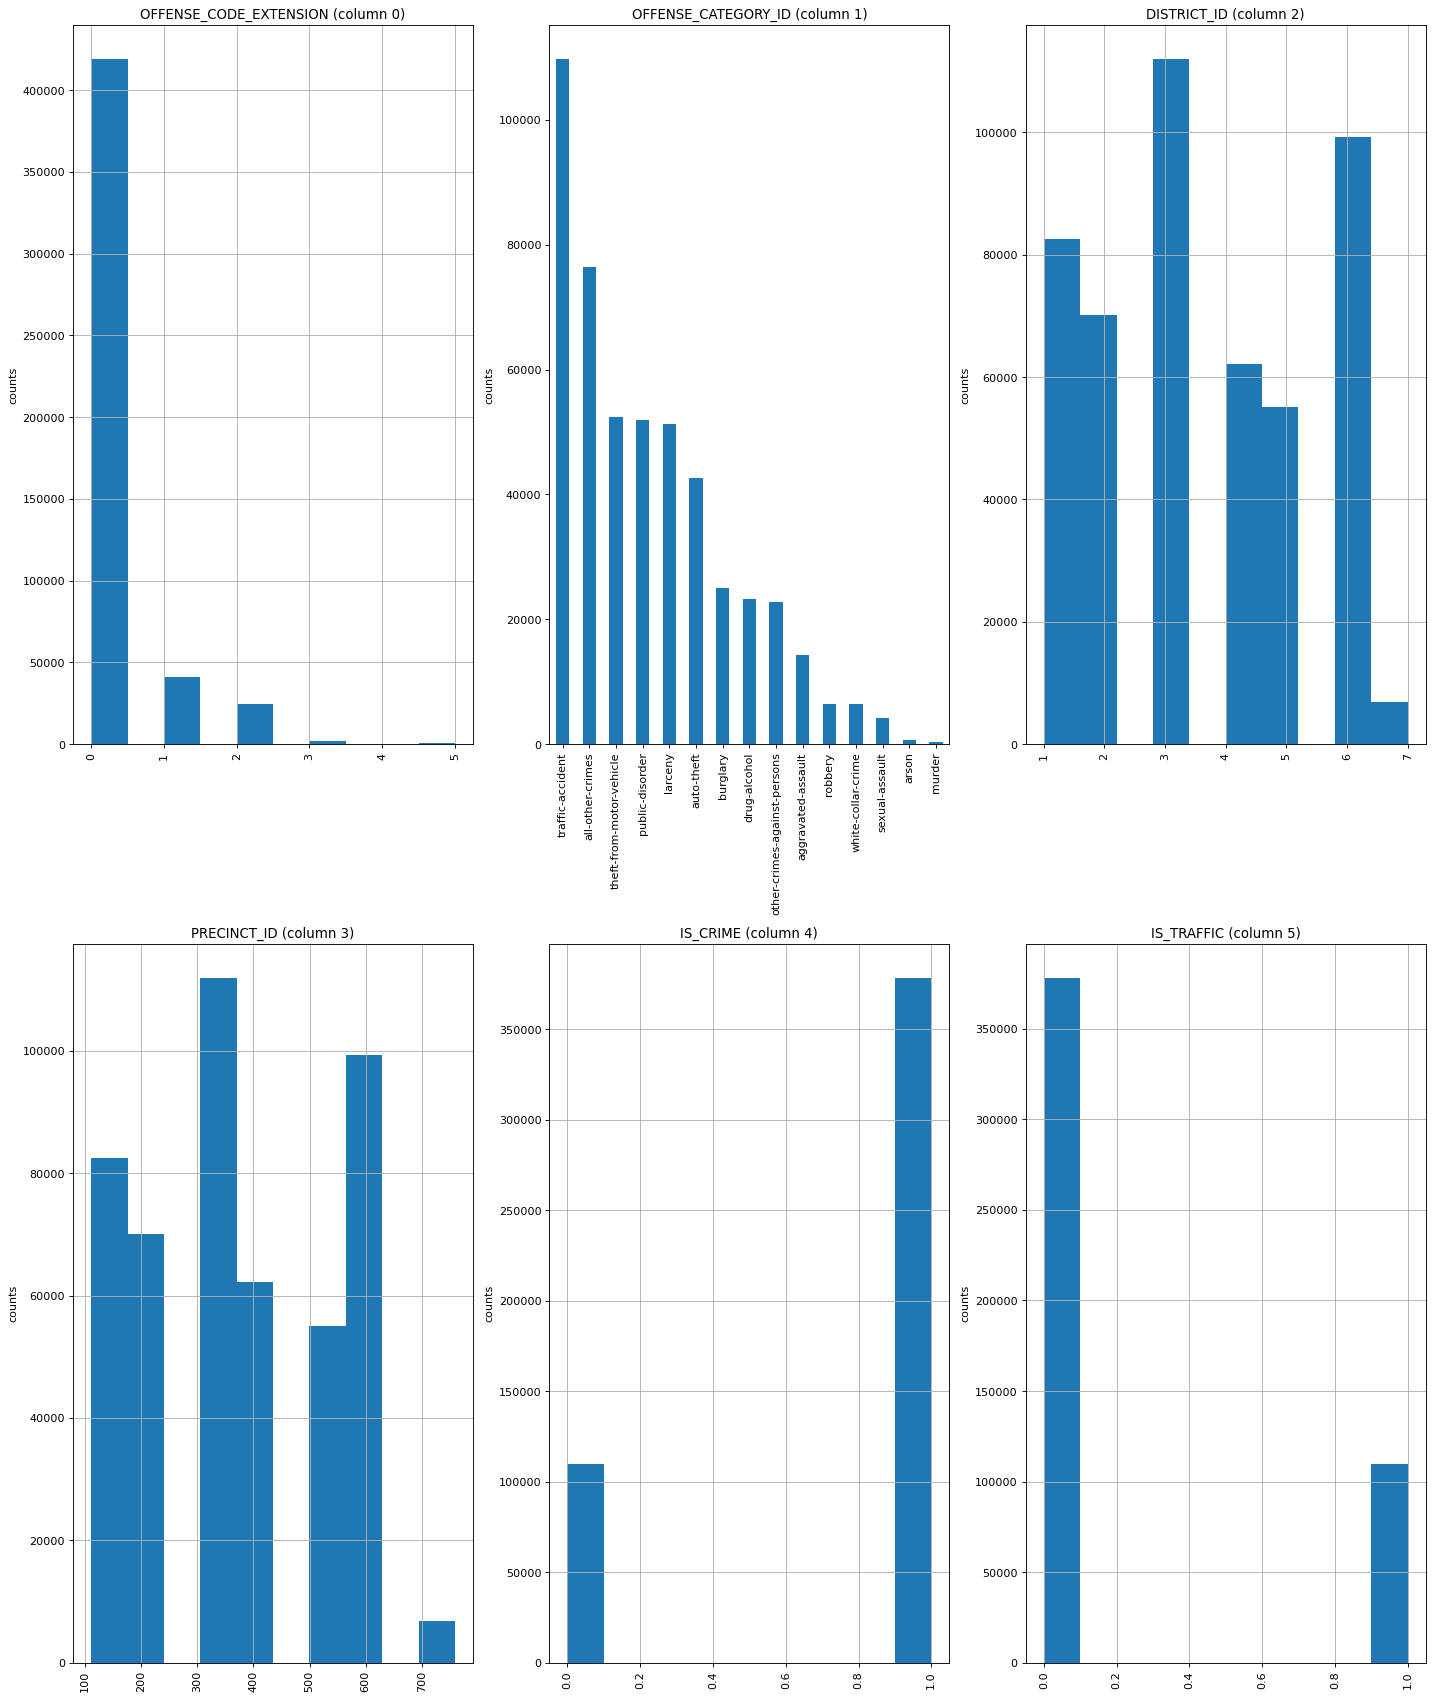

In [17]:
plotPerColumnDistribution(df, 10, 3)

<AxesSubplot:title={'center':'OFFENSE_CATEGORY_ID'}>

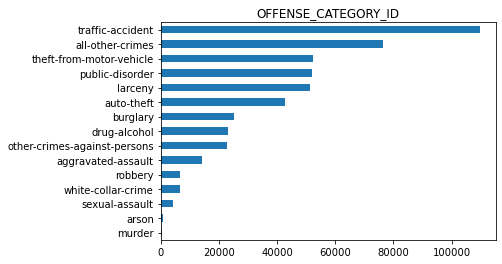

In [18]:
df['OFFENSE_CATEGORY_ID'].value_counts()[:15].sort_values(ascending=True).plot(kind='barh', 
                                                                               title='OFFENSE_CATEGORY_ID')